In [31]:
import pandas as pd
from pathlib import Path
import xgboost
import shap
import omegaconf
from src.data import get_dataset
shap.initjs()

chkppt_dir = '/home/bsulyok/documents/projects/ai4covid/data/raw_output/checkpoints/2022-03-02_17\:16\:35.774987'
config_path = Path(chkpt_dir) / "config.yaml"
config = omegaconf.OmegaConf.load(config_path)
dataset = config.datasets[config.dataset_identifier]

train_image, train_meta, train_brixia, train_prognosis, train_death = get_dataset(
    table_path=dataset.train_table,
    brixia_score_base_path=config.brixia_score_base_path,
    config=config
)
test_image, test_meta, test_brixia, test_prognosis, test_death = get_dataset(
    table_path=dataset.test_table,
    brixia_score_base_path=config.brixia_score_base_path,
    config=config,
    split="test",
)


train_X = pd.DataFrame(train_meta, columns=dataset.feature_cols)
train_X['brixia_score'] = train_brixia.sum(1)
train_y = train_prognosis[:, 1]

test_X = pd.DataFrame(test_meta, columns=dataset.feature_cols)
test_X['brixia_score'] = test_brixia.sum(1)

model = xgboost.XGBRegressor().fit(train_X, train_y)
explainer = shap.Explainer(model)
shap_values = explainer(test_X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [32]:
idx = 1
shap.plots.force(shap_values[idx])

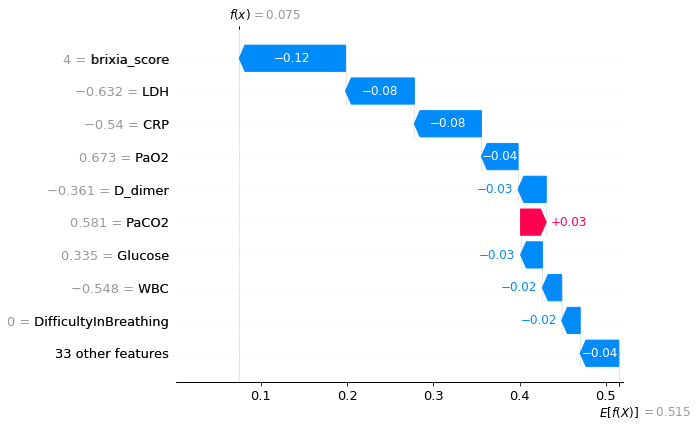

In [33]:
shap.plots.waterfall(shap_values[idx])

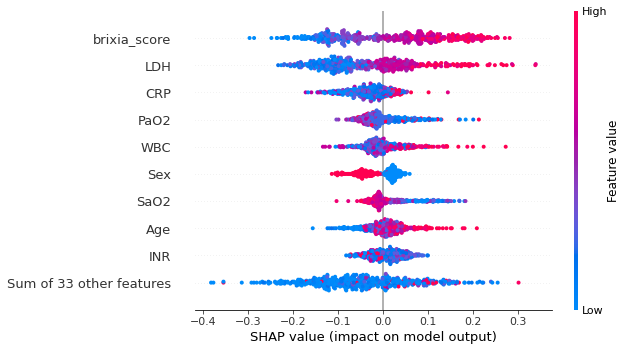

In [30]:
shap.plots.beeswarm(shap_values)